# Question 5: Counting Point Mutations: 
***
## Data Import

Lets use the with command to import the files. This is said to have a much better import quality. 

In [1]:
with open('Input_Data/SampleData.txt') as f: 
    strands = [line.rstrip() for line in f]
    
strands

['GAGCCTACTAACGGGAT', 'CATCGTAATGACGGCCT']

In [2]:
# let see what the length of each strand is: 

print(len(strands[0]))
print(len(strands[1]))

17
17


***
## Analysis:

**I will first show a simple way to find the answer then we can look at a more complicate way to find the answer which will help with visulizing our data**

Now lets compare them and see how they differ. For this we will use a for loop and compare by one base at a time.

Lets create two variables to count the no. of same base and no. of different base. 

In [3]:
strands[0][5:10]

'TACTA'

# First heading
## sub heading
### sub  sub heading

##### heading

In [4]:
diff = 0
Same = 0

for i in range(len(strands[0])):
    if strands[0][i]==strands[1][i]:
        Same += 1
    else: 
        diff += 1
        

In [5]:
print(Same)
print(diff)

10
7


## Data Ouptut

In [6]:
DNAOutput = open("Output_Data/SampleOutput.txt", "w")
DNAOutput.write(str(diff))
DNAOutput.close()

So there are 10 bases that are same and 7 bases diff between the two strands. Now lets look at a more complicated way to do this where we can use it for visualization too. 

*** 


## Data Visualization: 

now lets create a for loop and output a dataframe that has all the infomation about the mutation: 

In [7]:
import pandas as pd

In [8]:
# initiating the dataframe
df = pd.DataFrame(columns = ["Base_No", "Difference", "Strand1_Base", "Strand2_Base"])
df

,Base_No,Difference,Strand1_Base,Strand2_Base


In [9]:
# appending data into the dataframe one base at a time

for i in range(len(strands[0])):
    if strands[0][i]==strands[1][i]:
        df = df.append({"Base_No" : i+1, 
                      "Difference": "No", 
                      "Strand1_Base": strands[0][i], 
                      "Strand2_Base": strands[1][i]}, ignore_index=True)
        
    else: 
        df = df.append({"Base_No": i+1, 
                      "Difference": "Yes", 
                      "Strand1_Base": strands[0][i], 
                      "Strand2_Base": strands[1][i]}, ignore_index=True)

In [10]:
print(df.shape)
df.head() # the head command only print out first few lines of the df

(17, 4)


,Base_No,Difference,Strand1_Base,Strand2_Base
0,1,Yes,G,C
1,2,No,A,A
2,3,Yes,G,T
3,4,No,C,C
4,5,Yes,C,G


In [11]:
# Now we have just have to apply many filters to get the data we want.

df[ (df["Difference"]=="Yes") & (df["Strand1_Base"] == "A") & (df["Strand2_Base"] == 'G')]

# lets apply that to a for loop and get all the mutation point we need. 

,Base_No,Difference,Strand1_Base,Strand2_Base
9,10,Yes,A,G


Now lets look into what bases mutated into what other bases: 

for that I am creating a new dataframe and inputting the data into that. 

In [12]:
bases = ["A", "T", "G", "C"]

df_compare = pd.DataFrame(columns = ['Mutation', "Total"])

for i in bases: 
    for j in bases: 
        if i != j:   # this ignore the addition of A->A rows
            df_compare = df_compare.append({'Mutation': i + ' -> ' + j, 
                                           "Total": int(len(df[ (df["Difference"]=="Yes") & (df["Strand1_Base"] == i) & (df["Strand2_Base"] == j)]))}, 
                                          ignore_index=True)
df_compare

,Mutation,Total
0,A -> T,0
1,A -> G,1
2,A -> C,1
3,T -> A,0
4,T -> G,0
5,T -> C,0
6,G -> A,0
7,G -> T,1
8,G -> C,2
9,C -> A,1


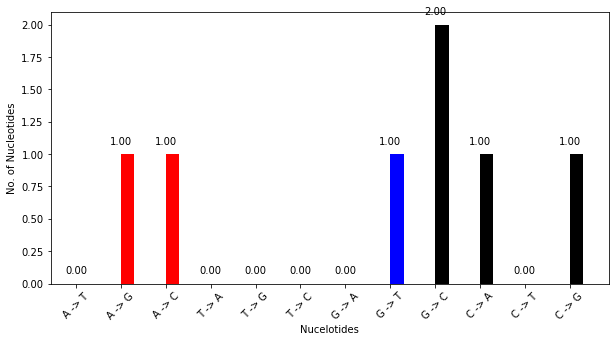

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.bar(df_compare['Mutation'], df_compare['Total'], align='edge', width=0.3, color = ['red', 'red','red', 'red',
                                                                                      'blue', 'blue','blue', 'blue',
                                                                                      'black', 'black','black', 'black',
                                                                                      'green', 'green','green', 'green'])
plt.xlabel('Nucelotides')
plt.ylabel('No. of Nucleotides')

for x,y in zip(df_compare['Mutation'], df_compare['Total']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(rotation=45)

plt.savefig("Visualization/SamplePlot.png")


Now lets filter for the mutated bases

***
***
## Lets try using plotly to make a Sankey plot:

for this you need the library called plotly, follow the instrution on how to install new libraries and install plolty on your conda envirnoment and then run these code:

The link that I followed to get the code for this is : https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0



In [14]:
bases = ["A", "T", "G", "C"]

df_compare_all = pd.DataFrame(columns = ['Base1', 'Base2', 'Mutated', 'Base_Mutated',"Total"])

for i in bases: 
    for j in bases: 
        if i==j: 
            df_compare_all = df_compare_all.append({'Base1': i,
                                                    'Base2': i+j,
                                                    'Mutated': 'No',
                                                   "Total": int(len(df[ (df["Strand1_Base"] == i) & (df["Strand2_Base"] == j)]))}, 
                                                  ignore_index=True)
        else: 
            df_compare_all = df_compare_all.append({'Base1': i,
                                                    'Base2': i+j,
                                                    'Mutated': 'Yes',
                                                    'Base_Mutated': i+'_Mutated',
                                                   "Total": int(len(df[ (df["Strand1_Base"] == i) & (df["Strand2_Base"] == j)]))}, 
                                                  ignore_index=True)
df_compare_all

,Base1,Base2,Mutated,Base_Mutated,Total
0,A,AA,No,NaN,3
1,A,AT,Yes,A_Mutated,0
2,A,AG,Yes,A_Mutated,1
3,A,AC,Yes,A_Mutated,1
4,T,TA,Yes,T_Mutated,0
5,T,TT,No,NaN,3
6,T,TG,Yes,T_Mutated,0
7,T,TC,Yes,T_Mutated,0
8,G,GA,Yes,G_Mutated,0
9,G,GT,Yes,G_Mutated,1


In [ ]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 20
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:

import pandas as pd
import plotly as py

fig = genSankey(df_compare_all,cat_cols=['Mutated','Base1', 'Base_Mutated','Base2'],value_cols='Total',title='Sankey Diagram')
py.offline.plot(fig, validate=False)